# Part 1 : TensorFlow ---------------------------------------------------------

In [146]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tn


# Step 1 : import the dataset

In [147]:

data = pd.read_csv('diabetes.csv')
data.columns

Index(['-0.294118', '0.487437', '0.180328', '-0.292929', '0', '0.00149028',
       '-0.53117', '-0.0333333', '0.1'],
      dtype='object')

In [148]:
# We dont have column names, so adding header to them
data = data.set_axis(['fr1','fr2','fr3','fr4','fr5','fr6','fr7','fr9','target'],axis=1)

# Step 2: Preprocessing the Data & Visualization

In [149]:
data.head()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [150]:
data.describe()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,-0.407807,0.218208,0.176500,-0.289731,-0.323961,-0.032289,-0.663427,-0.516799,0.654354
std,0.386493,0.306465,0.201420,0.258651,0.375608,0.205508,0.283202,0.400674,0.475893
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.179583,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.748506,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.532451,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
# to check is is there any duplicate rows
data.duplicated().sum()

0

In [152]:
data.isnull().sum()

fr1       0
fr2       0
fr3       0
fr4       0
fr5       0
fr6       0
fr7       0
fr9       0
target    0
dtype: int64

In [153]:
data.shape

(758, 9)

array([[<Axes: title={'center': 'fr1'}>, <Axes: title={'center': 'fr2'}>,
        <Axes: title={'center': 'fr3'}>],
       [<Axes: title={'center': 'fr4'}>, <Axes: title={'center': 'fr5'}>,
        <Axes: title={'center': 'fr6'}>],
       [<Axes: title={'center': 'fr7'}>, <Axes: title={'center': 'fr9'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

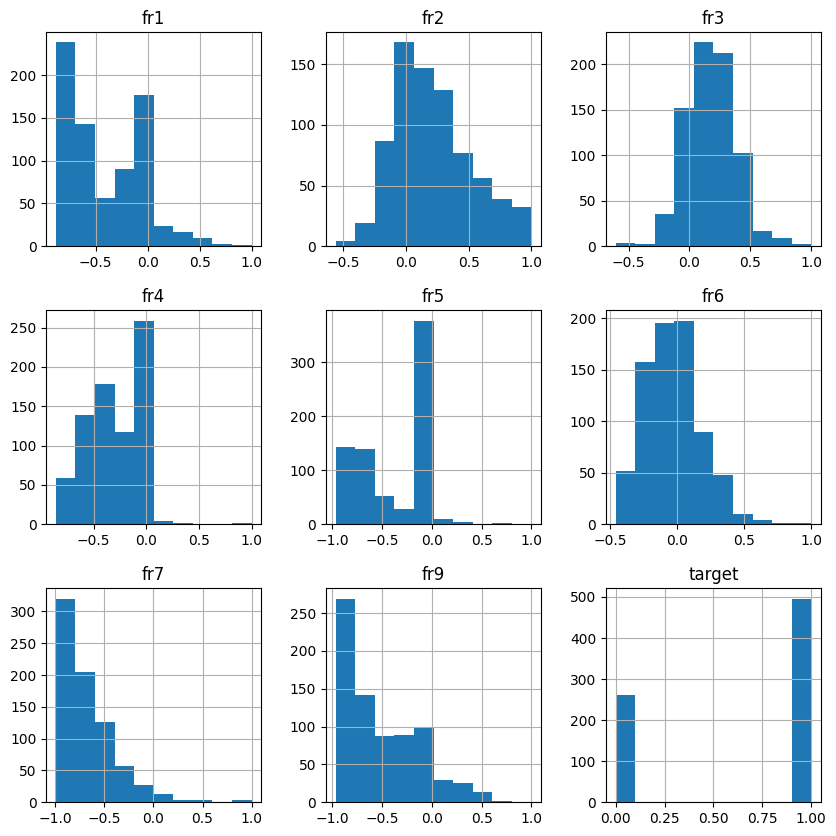

In [154]:
# visualizations of each data field
data.hist(figsize=(10,10))

<Axes: >

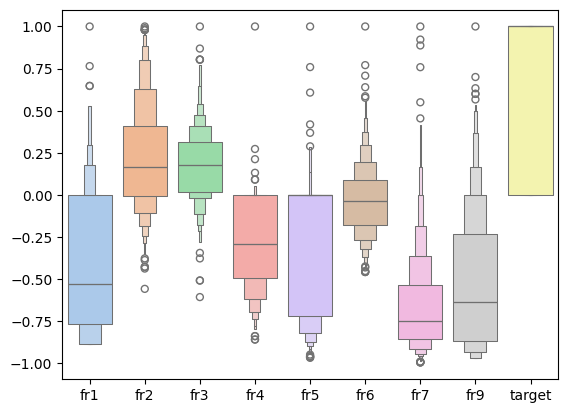

In [155]:
# Box plot to identify outliers
import seaborn as sns
sns.boxenplot(data=data,palette='pastel')

<Axes: >

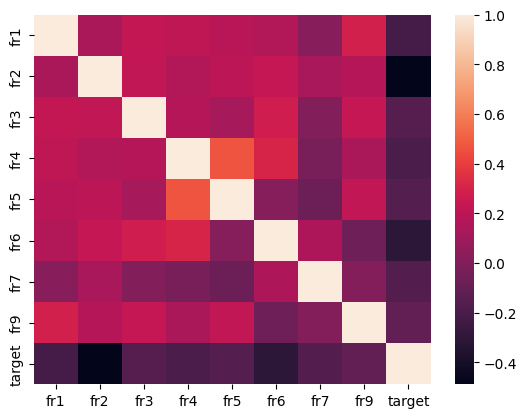

In [156]:
# heapMap to check Correlation of data points 
sns.heatmap(data.corr())

# Step 3: Split into 70% train 30% test

In [157]:
# Data needs to be scaled.

from sklearn.model_selection import train_test_split

x = data.drop(columns=['target'])
y = data['target']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_trained_scaled  = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


x_trained_scaled

array([[-0.01924968, -0.22083283,  0.34204625, ..., -0.19423045,
        -0.37066807,  0.70479237],
       [-1.23740727, -1.4535344 , -1.27872991, ...,  0.11026748,
         2.3178001 , -0.97630421],
       [ 0.28528972, -1.19401862,  0.50412426, ..., -0.19423045,
        -0.2551938 ,  0.53668195],
       ...,
       [-1.23740727, -0.72364506, -1.92704097, ..., -1.1367224 ,
        -0.97172368, -1.14441462],
       [ 1.04663951, -0.57766751,  0.34204625, ..., -2.05021917,
         0.3369789 , -0.72413985],
       [-0.62832848,  1.88773208, -0.63042034, ...,  0.21176676,
        -0.5838508 , -0.8081938 ]])

# Step 4: Modify the model 

In [158]:
# Now we will apply Keras for 

import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [159]:
# Creating Object 
model = Sequential()

In [160]:
model.add(Dense(3,activation='sigmoid',input_dim = 8)) # First Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Here, we can see how many weights and bias are given to each layer
model.summary()

# for better performance and acuracy while compile time we will declare loss_function and Optimizers
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 3)              │            27 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

# Step 5:  Train the model on the data

In [161]:
# we willl store all the values of 'accuracy' & 'loss' in a variable to plot graph of loss and Accuracy
acc_loss_model = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3256 - loss: 0.7473 - val_accuracy: 0.3962 - val_loss: 0.7265
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3098 - loss: 0.7438 - val_accuracy: 0.3899 - val_loss: 0.7215
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3371 - loss: 0.7311 - val_accuracy: 0.3962 - val_loss: 0.7172
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3555 - loss: 0.7205 - val_accuracy: 0.4151 - val_loss: 0.7130
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3723 - loss: 0.7210 - val_accuracy: 0.4214 - val_loss: 0.7090
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3910 - loss: 0.7158 - val_accuracy: 0.4654 - val_loss: 0.7053
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3943 - loss: 0.7110 - val_accuracy: 0.4906 - val_loss: 0.7016
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4545 - loss: 0.7053 - val_accuracy: 0.4969 - val_loss:

# Step 6 : Model is ready for prediction

In [162]:
y_pred_data = model.predict(x_test_scaled)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


# Step 7: Accuracy Calculation

In [163]:
from sklearn.metrics import accuracy_score

# Now, This is out task to convert prediction value in 0 & 1. for that we will apply condition, 
# if probability is > 0.5 then 1 (cutomer will leave the bank) , other wise 0 (cutomer will not leave the bank) 

y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

Accuracy of the ANN is :  65.35087719298247 %


# Difference of loss_value between training and testing phase

In [164]:
acc_loss_model.history

{'accuracy': [0.33423179388046265,
  0.3396226465702057,
  0.34770888090133667,
  0.3504043221473694,
  0.3638814091682434,
  0.3989218473434448,
  0.42048516869544983,
  0.4420485198497772,
  0.4716981053352356,
  0.506738543510437,
  0.5525606274604797,
  0.5741239786148071,
  0.6010781526565552,
  0.6199460625648499,
  0.6307277679443359,
  0.6334232091903687,
  0.6388140320777893,
  0.6388140320777893,
  0.64420485496521,
  0.6522911190986633],
 'loss': [0.743626594543457,
  0.7369641661643982,
  0.7302079200744629,
  0.7243033647537231,
  0.7187382578849792,
  0.7132940292358398,
  0.708437442779541,
  0.7034632563591003,
  0.6988359093666077,
  0.6944778561592102,
  0.6905850172042847,
  0.6862549781799316,
  0.6828318238258362,
  0.6788055300712585,
  0.6751317977905273,
  0.671989917755127,
  0.6682634353637695,
  0.6653472781181335,
  0.6619746685028076,
  0.6591260433197021],
 'val_accuracy': [0.3962264060974121,
  0.3899371027946472,
  0.3962264060974121,
  0.415094345808029

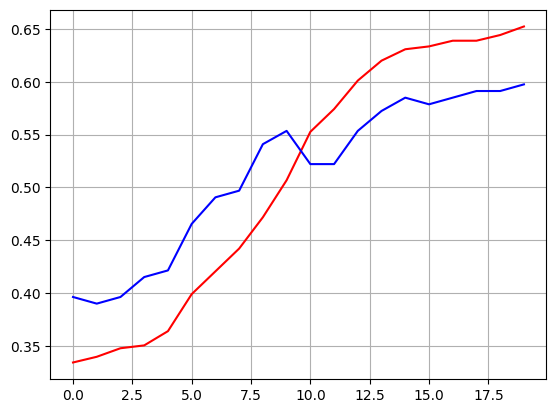

In [165]:
plt.plot(acc_loss_model.history['accuracy'],color='Red')
plt.plot(acc_loss_model.history['val_accuracy'],color='blue')
plt.grid()

# Step 8: Hypothesize

# 1) Changing the number of layers 

In [166]:

# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(3,activation='sigmoid',input_dim = 8)) # First Hidden Layer
model.add(Dense(3,activation='sigmoid')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6864 - loss: 0.6269 - val_accuracy: 0.6038 - val_loss: 0.7126
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6496 - loss: 0.6639 - val_accuracy: 0.6038 - val_loss: 0.7076
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - loss: 0.6633 - val_accuracy: 0.6038 - val_loss: 0.7030
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6714 - loss: 0.6356 - val_accuracy: 0.6038 - val_loss: 0.6991
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6550 - loss: 0.6501 - val_accuracy: 0.6038 - val_loss: 0.6952
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6777 - loss: 0.6233 - val_accuracy: 0.6038 - val_loss: 0.6920
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6570 - loss: 0.6411 - val_accuracy: 0.6038 - val_loss: 0.6886
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6515 - loss: 0.6483 - val_accuracy: 0.6038 - val_loss: 0.6851
Epo

{'accuracy': [0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374],
 'loss': [0.6490162014961243,
  0.6463193893432617,
  0.6436476707458496,
  0.6410124897956848,
  0.6388756036758423,
  0.636717677116394,
  0.6349607110023499,
  0.6333907246589661,
  0.6315974593162537,
  0.6302712559700012,
  0.6288661360740662,
  0.6277716159820557,
  0.6264601349830627,
  0.6253771781921387,
  0.6243064999580383,
  0.6232059001922607,
  0.6221745610237122,
  0.6210765838623047,
  0.6200827956199646,
  0.6189674139022827],
 'val_accuracy': [0.6037735939025879,
  0.6037735939025879,
  0.6037735939025879,
  0.6037735939025

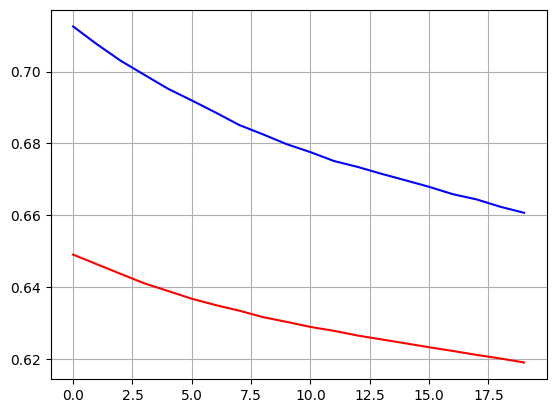

In [167]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- As we can see by adding additional layer on Neural network we achive around 0.64 of loss while training we achived 0.61.

# 2) Changing number of Dense

In [168]:

# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(5,activation='sigmoid',input_dim = 8)) # First Hidden Layer
model.add(Dense(5,activation='sigmoid')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3087 - loss: 0.7341 - val_accuracy: 0.3585 - val_loss: 0.7172
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3103 - loss: 0.7232 - val_accuracy: 0.3585 - val_loss: 0.7102
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3251 - loss: 0.7086 - val_accuracy: 0.3962 - val_loss: 0.7039
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3937 - loss: 0.7031 - val_accuracy: 0.4528 - val_loss: 0.6981
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4966 - loss: 0.6907 - val_accuracy: 0.5912 - val_loss: 0.6934
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6350 - loss: 0.6849 - val_accuracy: 0.6038 - val_loss: 0.6897
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6716 - loss: 0.6782 - val_accuracy: 0.6038 - val_loss: 0.6863
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7070 - loss: 0.6649 - val_accuracy: 0.6038 - val_loss: 0.6835
Epo

{'accuracy': [0.328840970993042,
  0.32345014810562134,
  0.33423179388046265,
  0.42318058013916016,
  0.5121293663978577,
  0.6415094137191772,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374,
  0.6657682061195374],
 'loss': [0.7317535281181335,
  0.7196927666664124,
  0.708848237991333,
  0.6998856663703918,
  0.6914713382720947,
  0.6835787892341614,
  0.6774551868438721,
  0.6719488501548767,
  0.6664146184921265,
  0.6619586944580078,
  0.6576418280601501,
  0.6542047262191772,
  0.6509711742401123,
  0.6480531096458435,
  0.6452414989471436,
  0.6430287957191467,
  0.6408694386482239,
  0.6390696167945862,
  0.6371921896934509,
  0.6360301971435547],
 'val_accuracy': [0.35849055647850037,
  0.35849055647850037,
  0.3962264060974121,
  0.452830195

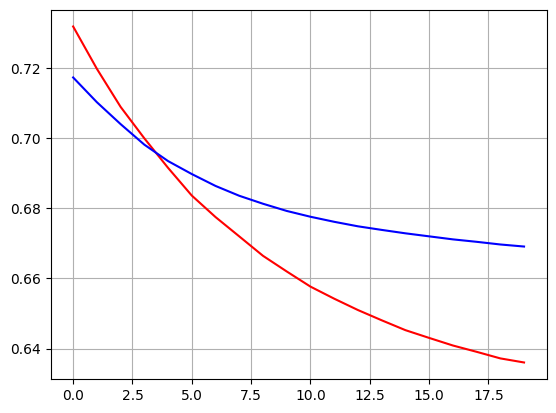

In [169]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- As we can see by adding additional dense on Neural network we achive around 0.65 of loss while training we achived 0.62.

# 3) Changing activation function as 'ReLU'

In [170]:

# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(5,activation='relu',input_dim = 8)) # First Hidden Layer
model.add(Dense(5,activation='relu')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3836 - loss: 0.7941 - val_accuracy: 0.5094 - val_loss: 0.7362
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4493 - loss: 0.7604 - val_accuracy: 0.5535 - val_loss: 0.7165
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5434 - loss: 0.7528 - val_accuracy: 0.5660 - val_loss: 0.7016
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5823 - loss: 0.7287 - val_accuracy: 0.5786 - val_loss: 0.6900
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5662 - loss: 0.7323 - val_accuracy: 0.6164 - val_loss: 0.6806
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6154 - loss: 0.7146 - val_accuracy: 0.6352 - val_loss: 0.6741
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6407 - loss: 0.6937 - val_accuracy: 0.6667 - val_loss: 0.6686
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6492 - loss: 0.7024 - val_accuracy: 0.6918 - val_loss: 0.6639
Epo

{'accuracy': [0.4150943458080292,
  0.46630728244781494,
  0.5363881587982178,
  0.5714285969734192,
  0.5849056839942932,
  0.6145552396774292,
  0.6307277679443359,
  0.6522911190986633,
  0.6738544702529907,
  0.6684635877609253,
  0.6792452931404114,
  0.684636116027832,
  0.684636116027832,
  0.6900269389152527,
  0.6900269389152527,
  0.6927223801612854,
  0.6819406747817993,
  0.6873315572738647,
  0.6873315572738647,
  0.6900269389152527],
 'loss': [0.8017508387565613,
  0.7716397643089294,
  0.7494235634803772,
  0.732168436050415,
  0.7197856903076172,
  0.7087980508804321,
  0.7009515762329102,
  0.6941929459571838,
  0.6877869367599487,
  0.6822097301483154,
  0.6772778630256653,
  0.6725155115127563,
  0.667795717716217,
  0.6635281443595886,
  0.6587556600570679,
  0.6536038517951965,
  0.6487556099891663,
  0.642787754535675,
  0.637220025062561,
  0.6309346556663513],
 'val_accuracy': [0.5094339847564697,
  0.553459107875824,
  0.5660377144813538,
  0.5786163806915283,


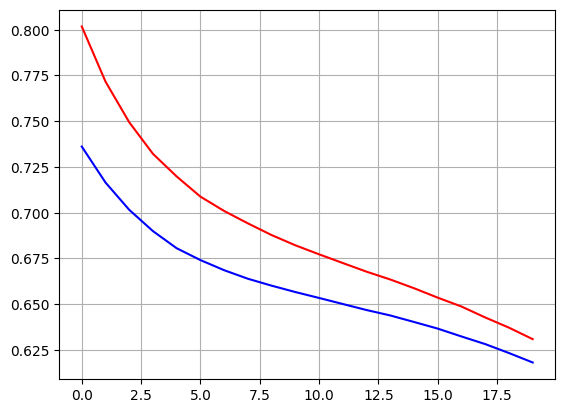

In [171]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- As we can see by changing activation function layer on Neural network we achive around 0.56 of loss while testing phase. This is better than previous two hypothesize.

# 4) Changing Loss Function with 'mean_squared_error'

In [172]:
# Creating Object 
model = Sequential()

# Model Architecture
model.add(Dense(5,activation='relu',input_dim = 8)) # First Hidden Layer
model.add(Dense(5,activation='relu')) # Second Hidden Layer
model.add(Dense(1,activation='sigmoid')) # Output Layer

# Model Compilation
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

# Model Training
model_train = model.fit(x_trained_scaled,y_train,epochs=20, validation_split=0.3)

# Model Prediction
y_pred_data = model.predict(x_test_scaled)

# accuracy calculation of model 
y_final_pred = np.where(y_pred_data>0.5, 1, 0)
Accuracy = accuracy_score(y_test,y_final_pred)

print('Accuracy of the ANN is : ',  Accuracy*100,'%')

# History of model accuracy & loss
model_train.history

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4078 - loss: 0.2729 - val_accuracy: 0.4528 - val_loss: 0.2709
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4506 - loss: 0.2606 - val_accuracy: 0.5094 - val_loss: 0.2673
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5226 - loss: 0.2560 - val_accuracy: 0.5220 - val_loss: 0.2642
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5561 - loss: 0.2540 - val_accuracy: 0.5409 - val_loss: 0.2615
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6014 - loss: 0.2512 - val_accuracy: 0.5220 - val_loss: 0.2592
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6452 - loss: 0.2477 - val_accuracy: 0.5283 - val_loss: 0.2570
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6630 - loss: 0.2415 - val_accuracy: 0.5535 - val_loss: 0.2552
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6654 - loss: 0.2426 - val_accuracy: 0.5597 - val_loss: 0.2534
Epo

{'accuracy': [0.4393531084060669,
  0.4528301954269409,
  0.5175201892852783,
  0.5606468915939331,
  0.6037735939025879,
  0.6469002962112427,
  0.6522911190986633,
  0.657681941986084,
  0.657681941986084,
  0.6630727648735046,
  0.6657682061195374,
  0.684636116027832,
  0.698113203048706,
  0.7061994671821594,
  0.7035040259361267,
  0.7088949084281921,
  0.7035040259361267,
  0.7061994671821594,
  0.7061994671821594,
  0.7035040259361267],
 'loss': [0.26976972818374634,
  0.26423361897468567,
  0.2594917416572571,
  0.2546967566013336,
  0.25076764822006226,
  0.24721738696098328,
  0.24437499046325684,
  0.24202074110507965,
  0.23957565426826477,
  0.23766662180423737,
  0.2358854115009308,
  0.23406894505023956,
  0.2323833405971527,
  0.23090964555740356,
  0.22927223145961761,
  0.2276538759469986,
  0.22609803080558777,
  0.22446945309638977,
  0.22267214953899384,
  0.22089062631130219],
 'val_accuracy': [0.4528301954269409,
  0.5094339847564697,
  0.5220125913619995,
  0.5

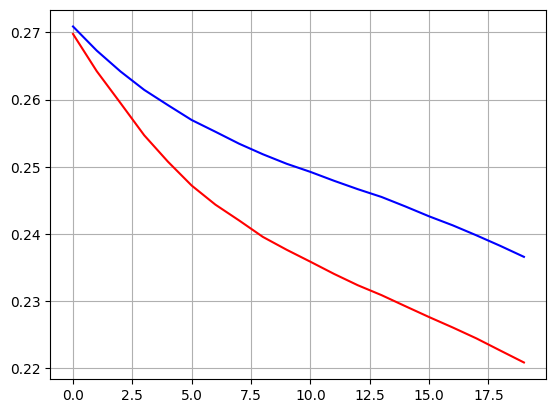

In [173]:
# Model accuracy Graph
plt.plot(model_train.history['loss'],color='Red')
plt.plot(model_train.history['val_loss'],color='blue')
plt.grid()

# Description 
- So, by replacing activation function with 'mean_squared_error' we achivedaround 0.18 of loss which is better than all the hypothesize.
- In this, we have additional hidden layers, additional denses, ReLU as activation function, and 'mean_squared_error' as loss function.  

# Part 2 : PyTorch ---------------------------------------------------------

In [174]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


# Step 1 : import the dataset

In [175]:
data = pd.read_csv('diabetes.csv')
data.columns

Index(['-0.294118', '0.487437', '0.180328', '-0.292929', '0', '0.00149028',
       '-0.53117', '-0.0333333', '0.1'],
      dtype='object')

# Step 2: Preprocessing the Data & Visualization

In [176]:
# We dont have column names, so adding header to them
data = data.set_axis(['fr1','fr2','fr3','fr4','fr5','fr6','fr7','fr9','target'],axis=1)

In [177]:
data.head()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [178]:
data.describe()

,fr1,fr2,fr3,fr4,fr5,fr6,fr7,fr9,target
count,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000,758.000000
mean,-0.407807,0.218208,0.176500,-0.289731,-0.323961,-0.032289,-0.663427,-0.516799,0.654354
std,0.386493,0.306465,0.201420,0.258651,0.375608,0.205508,0.283202,0.400674,0.475893
min,-0.882353,-0.557789,-0.606557,-0.858586,-0.966903,-0.457526,-0.994876,-0.966667,0.000000
25%,-0.764706,-0.005025,0.016393,-0.494949,-0.716312,-0.179583,-0.858241,-0.866667,0.000000
50%,-0.529412,0.165829,0.180328,-0.292929,0.000000,-0.034277,-0.748506,-0.633333,1.000000
75%,0.000000,0.407035,0.311475,0.000000,0.000000,0.087929,-0.532451,-0.233333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [179]:
data.isnull().sum()

fr1       0
fr2       0
fr3       0
fr4       0
fr5       0
fr6       0
fr7       0
fr9       0
target    0
dtype: int64

In [180]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
753    False
754    False
755    False
756    False
757    False
Length: 758, dtype: bool

array([[<Axes: title={'center': 'fr1'}>, <Axes: title={'center': 'fr2'}>,
        <Axes: title={'center': 'fr3'}>],
       [<Axes: title={'center': 'fr4'}>, <Axes: title={'center': 'fr5'}>,
        <Axes: title={'center': 'fr6'}>],
       [<Axes: title={'center': 'fr7'}>, <Axes: title={'center': 'fr9'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

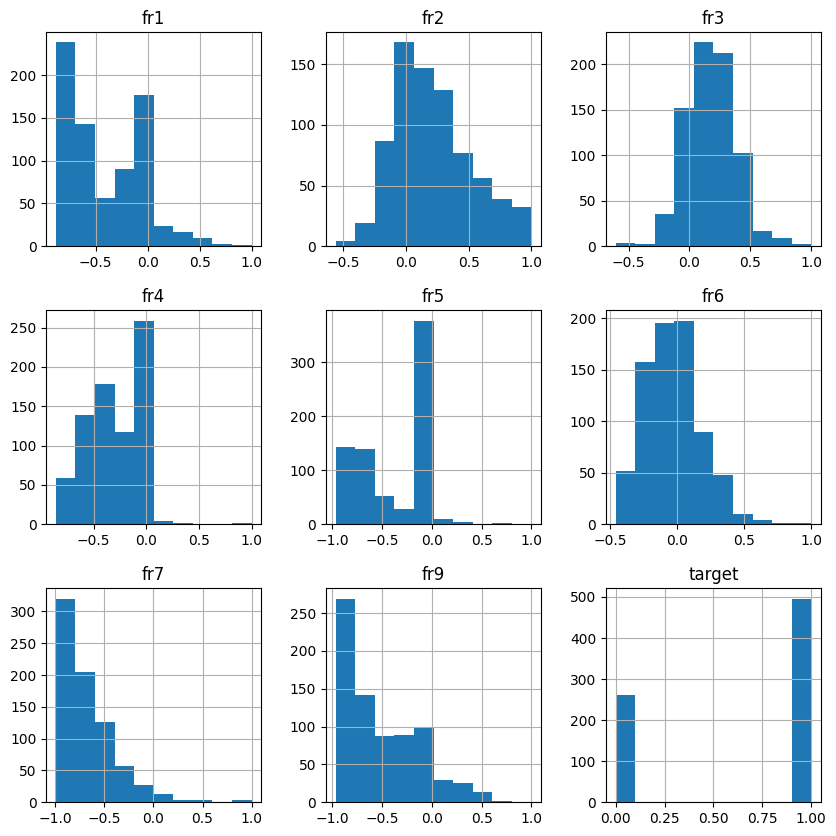

In [181]:
# we have already described many data visualization in Part 1.
data.hist(figsize=(10,10))

# Step 3: Split into 70% train 30% test

In [182]:

from sklearn.model_selection import train_test_split

x = data.drop(columns=['target'])
y = data['target']

features_normalized = (x - x.mean()) / x.std()

# Converting to PyTorch tensors
features_tensor = torch.tensor(features_normalized.values, dtype=torch.float32)
labels_tensor = torch.tensor(y.values, dtype=torch.float32)


x_train, x_test, y_train, y_test = train_test_split(features_tensor,labels_tensor,test_size=0.3,random_state=1)


# Step 4: Modify the model 


In [183]:
import torch.nn as nn
import torch.optim as optim


class DModel(nn.Module):
    def __init__(self):
        super(DModel, self).__init__()
        self.layer1 = nn.Linear(features_tensor.shape[1], 16)
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(16, 16)
        self.activation2 = nn.ReLU()
        self.output_layer = nn.Linear(16, 1)

    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.output_layer(x)
        return x

model = DModel()


# Step 5: Training the model

In [184]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()

def model_training(model, x_train, y_train, epochs=100):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs.squeeze(), y_train)
        loss.backward()
        optimizer.step()

model_training(model, x_train, y_train)

# Step 6-7 : Model Prediction & Evalution 

In [185]:
model.eval()
with torch.no_grad():
    outputs = model(x_test)
    predictions = torch.sigmoid(outputs) > 0.5
    accuracy = (predictions.squeeze().int() == y_test.int()).float().mean().item()

print(accuracy*100,'%')

76.75438523292542 %


# Step 8 : Hypothesize

By doubling size of the layer, accuracy has been almost same.

In [189]:
# Changing width size

class DModel(nn.Module):
    def __init__(self):
        super(DModel, self).__init__()
        self.layer1 = nn.Linear(features_tensor.shape[1], 32)  # doubled width
        self.activation1 = nn.ReLU()
        self.layer2 = nn.Linear(32, 32) # doubled width
        self.activation2 = nn.ReLU()
        self.output_layer = nn.Linear(32, 1)

    def forward(self, x):
        x = self.activation1(self.layer1(x))
        x = self.activation2(self.layer2(x))
        x = self.output_layer(x)
        return x

model = DModel()

optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCEWithLogitsLoss()

def model_training(model, x_train, y_train, epochs=100):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs.squeeze(), y_train)
        loss.backward()
        optimizer.step()

model_training(model, x_train, y_train)


model.eval()
with torch.no_grad():
    outputs = model(x_test)
    predictions = torch.sigmoid(outputs) > 0.5
    accuracy = (predictions.squeeze().int() == y_test.int()).float().mean().item()

print(accuracy*100,'%')

74.56140518188477 %
